In [1]:
import numpy as np
from evtools.sim_tools.process_evcdr import ProcessEVCDR

evcdr = ProcessEVCDR(folder_index=0, filename='ibm_nazca_submission', use_local_data=True)
evcdr.max_hamming_distance=0
evcdr.ancilla_neighbourhood_size=0
evcdr.get_results()

----------------------------
| Processing step number 1 |
----------------------------
>> loaded qpu job
>> retrieved measurement data
>> extracted noisy expectation values
>> completed clifford fitting procedure
----------------------------
| Processing step number 2 |
----------------------------
>> loaded qpu job
>> retrieved measurement data
>> extracted noisy expectation values
>> completed clifford fitting procedure
----------------------------
| Processing step number 3 |
----------------------------
>> loaded qpu job
>> retrieved measurement data
>> extracted noisy expectation values
>> completed clifford fitting procedure
----------------------------
| Processing step number 4 |
----------------------------
>> loaded qpu job
>> retrieved measurement data
>> extracted noisy expectation values
>> completed clifford fitting procedure
----------------------------
| Processing step number 5 |
----------------------------
>> loaded qpu job
>> retrieved measurement data
>> extracted 

In [2]:
# success_probabilities = (
#     np.mean(list(evcdr.results['standard_data']['X']['p0'].values()), axes[0]=1) + 
#     np.mean(list(evcdr.results['standard_data']['Y']['p0'].values()), axes[0]=1) + 
#     np.mean(list(evcdr.results['standard_data']['Z']['p0'].values()), axes[0]=1)
# ) / 3
# print(success_probabilities.tolist())
# print(np.mean(list(evcdr.results['purities'].values()), axes[0]=1).tolist())

In [3]:
sherbrooke_p0     = [0.9319099565013728, 0.7584883502376781, 0.4062662569332201, 0.017481486034159506, 0.01438056098090275, 0.010804918077256948, 0.005020141601562501, 0.0037468804253472225, 0.0024956597222222225, 0.001942952473958334]
brisbane_p0_1     = [0.9583744326811067, 0.7061832467952215, 0.22292840962223956, 0.006237453884548612, 0.012551201714409724, 0.006176418728298612, 0.002329508463541667, 0.0017615424262152782, 0.0018819173177083337, 0.0030907524956597225]
brisbane_p0_2     = [0.9572184639336809, 0.7526338773862481, 0.23080644192808789, 0.022559271920645888, 0.01109653049045139, 0.006808810763888891, 0.005589803059895835, 0.002119276258680556, 0.0036044650607638894, 0.001356336805555556]
brisbane_p0       = (np.array(brisbane_p0_1)+np.array(brisbane_p0_2))/2
cusco_p0          = [0.8303580759595696, 0.4099019368489583, 0.08617345536676761, 0.009301079644097225, 0.002790662977430556, 0.0024719238281250004, 0.0010664198133680557, 0.0010036892361111112, 0.0009545220269097224, 0.0006086561414930556]
nazca_p0          = [0.9292488669507885, 0.6052575714132296, 0.1793681010108054, 0.008439805772569446, 0.005143907335069446, 0.002483791775173612, 0.0014953613281250002, 0.001291910807291667, 0.0008494059244791668, 0.0009324815538194446]
sherbrooke_purity = [1.0006701639467528, 0.966323822683719, 0.9217584452071242, 0.8899943556673354, 0.8589769909247603, 0.8086617924090819, 0.8334593093428827, 0.8040208829512699, 0.8229101464895437, 0.7539670519775065]
brisbane_purity_1 = [0.9950217219131988, 0.8908350393179978, 0.8994804407933055, 0.9134833544082874, 0.8246458122891488, 0.8180675799262995, 0.796701409477108, 0.7038675510980522, 0.7039623321174654, 0.6916113179002773]
brisbane_purity_2 = [0.9949986128491685, 0.9421361796232169, 0.8935325659338403, 0.8537872901929675, 0.8304877439679208, 0.7857393845296899, 0.8065100741856278, 0.6976668553762909, 0.700505451474022, 0.652555551559897]
brisbane_purity   = (np.array(brisbane_purity_1)+np.array(brisbane_purity_2))/2
cusco_purity      = [0.9364970607800237, 0.7983641836439106, 0.7227479472197244, 0.6760442641753727, 0.6666565213205516, 0.6648067492034654, 0.6927055876965733, 0.7194562762064184, 0.7138722257443444, 0.6566719951603331]
nazca_purity      = [0.9506152027373047, 0.9499905360018669, 0.8030342593468575, 0.7861081861707949, 0.7103437624755949, 0.717787087130174, 0.6550691223915993, 0.6389208426162108, 0.6802050238298599, 0.6792375199527236]

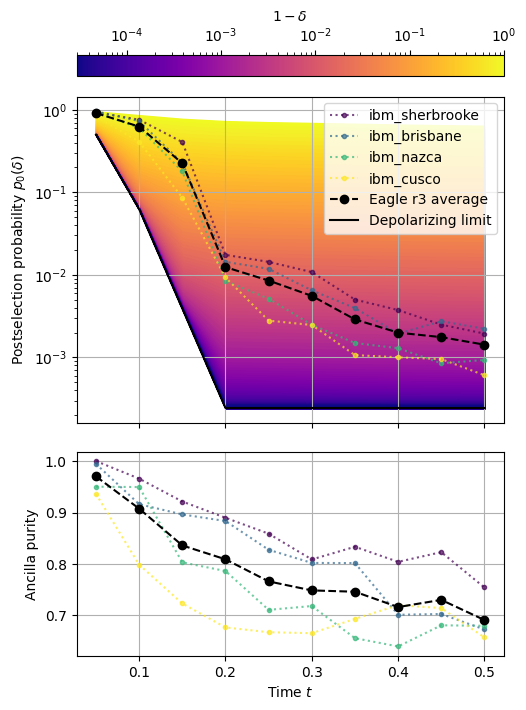

In [4]:
from matplotlib.colors import LogNorm
from matplotlib import pyplot as plt

_times = np.linspace(0,0.5,11)[1:]
noiseless_energies = np.hstack(list(evcdr.results['expvals']['exact'].values()))
d = 2 ** np.array([int(len(qs)/6) for qs in evcdr.results['active_qubits'].values()])

fig,axes = plt.subplots(2,1,gridspec_kw={'height_ratios':(2,1)},figsize=(5,7),sharex=True)
fig.tight_layout()
cmap = plt.cm.plasma_r
n_points = 100
deltas = 1-0.9**np.arange(n_points)
for i,delta in enumerate(deltas):
    p0 = (1-delta)*(1+noiseless_energies**2)/2 + 2*delta/d
    axes[0].fill_between(_times, 2/d, p0, color=cmap(i/(n_points-1)))

cmap = plt.cm.viridis
for i,(name,data_p0,data_purity) in enumerate(zip(
        ['ibm_sherbrooke','ibm_brisbane','ibm_nazca','ibm_cusco'],
        [sherbrooke_p0,brisbane_p0,nazca_p0,cusco_p0],
        [sherbrooke_purity,brisbane_purity,nazca_purity,cusco_purity]
        )
    ):
    axes[0].plot(_times, data_p0, label=name, marker='.', ls=':', color=cmap(i/3), alpha=0.7)
    axes[1].plot(_times, data_purity, label=name, marker='.', ls=':', color=cmap(i/3), alpha=0.7)

eagle_avg_p0 = (np.array(cusco_p0)+np.array(nazca_p0)+np.array(brisbane_p0)+np.array(sherbrooke_p0))/4
axes[0].plot(_times,eagle_avg_p0,color='black', marker='o', ls='--', label='Eagle r3 average')
eagle_avg_purity = (np.array(cusco_purity)+np.array(nazca_purity)+np.array(brisbane_purity)+np.array(sherbrooke_purity))/4
axes[1].plot(_times,eagle_avg_purity,color='black', marker='o', ls='--', label='Eagle r3 average')

axes[0].set_ylabel('Postselection probability $p_0(\delta)$')
axes[1].set_ylabel('Ancilla purity')
axes[1].set_xlabel('Time $t$')

cbar = fig.colorbar(
    plt.cm.ScalarMappable(norm=LogNorm(vmin=(1-deltas)[-1], vmax=1), cmap=plt.cm.plasma), 
    ax=axes[0], orientation='horizontal', location="top")
cbar.set_label('$1-\delta$')

axes[0].plot(_times, 2/d, ls='-', label='Depolarizing limit', color='black')
axes[0].grid()
axes[1].grid()
axes[0].legend(loc='upper right')
axes[0].set_yscale('log')
# fig.savefig('plots/12_qubit_p0_plot.pdf', dpi=300, bbox_inches='tight', transparent=True)